In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
def clean_df(df):
    df = df[df.caption != '']
    
    return df.reset_index(drop=True)

In [27]:
len(rev_files)

4818

In [23]:
rev_dpath = '../data/outputs/reviews/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rev = pd.DataFrame()
for file in rev_files:
    
    df = pd.read_json(file)
    df_clean = clean_df(df)
    df_clean['place_id'] = file.split('_',1)[1]
    df_clean['place_id'] = df_clean['place_id'].str.replace('.json','')
    df_rev = pd.concat((df_rev, df_clean), ignore_index=True)

In [24]:
rev_dpath = '../data/outputs/cbg_restaurants/'
        
rev_files = [rev_dpath+ f for f in os.listdir(rev_dpath)]
df_rest = pd.DataFrame()
for file in rev_files[:725]:
    
    df = pd.read_json(file)

    df_rest = pd.concat((df_rest, df), ignore_index=True)

In [25]:
df_join = df_rest.join(df_rev.set_index('place_id'),on = 'place_id',lsuffix='_rest', how='inner')

In [180]:
def binary_class_rev(rating):
    if rating ==2:
        return 1
    else:
        return 0

In [26]:
df_prep = df_join.drop_duplicates(subset = ['id_review'], keep='first')
df_prep['rev_length'] = df_prep.caption.str.len()
df_prep = df_prep[df_prep.rev_length>25]
# df_prep['rating_cat'] = df_prep['rating'].apply(lambda x: binary_class_rev(x))
df_prep

C:\Users\swami\Anaconda3\envs\base_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,business_status,geometry,icon,name,opening_hours,photos,place_id,plus_code,reference,scope,...,caption,relative_date,retrieval_date,rating,username,n_review_user,n_photo_user,url_user,census_block_group,rev_length
1,OPERATIONAL,"{'location': {'lat': 33.5206608, 'lng': -86.80...",https://maps.gstatic.com/mapfiles/place_api/ic...,Restaurants,None,"[{'height': 1280, 'html_attributions': ['<a hr...",ChIJNe0mPMkbiYgR6oApk2Pt7F8,"{'compound_code': 'G5CX+72 Birmingham, AL, USA...",ChIJNe0mPMkbiYgR6oApk2Pt7F8,GOOGLE,...,Money to pawy secy y QPRyiy,2 years ago,2021-03-23,1,Prathamesh Adhikari,1,0,https://www.google.com/maps/contrib/1146220333...,10730027002,27
2,OPERATIONAL,"{'location': {'lat': 32.6146592, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,The Cup and Saucer Casseroles Catering & More,{'open_now': False},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,GOOGLE,...,Delicious food all the way around! Cup and Sau...,7 months ago,2021-03-23,5,Melissa Atkinson,0,0,https://www.google.com/maps/contrib/1127619209...,10810402004,368
2,OPERATIONAL,"{'location': {'lat': 32.6146592, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,The Cup and Saucer Casseroles Catering & More,{'open_now': False},"[{'height': 4032, 'html_attributions': ['<a hr...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgR_Qxv-sQ4Gpk,GOOGLE,...,"Great frozen homemade casseroles, refrigerated...",2 years ago,2021-03-23,5,Tana Branch,0,0,https://www.google.com/maps/contrib/1084704427...,10810402004,214
3,OPERATIONAL,"{'location': {'lat': 32.6146842, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,Yum Yums Food Specialty Shoppe and Grocery,{'open_now': False},"[{'height': 640, 'html_attributions': ['<a hre...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,GOOGLE,...,We had the food for a work event and it was ve...,a year ago,2021-03-23,5,Liv Laugh BTS,6,0,https://www.google.com/maps/contrib/1010388976...,10810402004,164
3,OPERATIONAL,"{'location': {'lat': 32.6146842, 'lng': -85.47...",https://maps.gstatic.com/mapfiles/place_api/ic...,Yum Yums Food Specialty Shoppe and Grocery,{'open_now': False},"[{'height': 640, 'html_attributions': ['<a hre...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,"{'compound_code': 'JG7H+VX Auburn, AL, USA', '...",ChIJFdCPZt3yjIgRnCIXz-jIfVw,GOOGLE,...,Food is great ad well as service.,2 years ago,2021-03-23,4,Carol Lisenby,0,0,https://www.google.com/maps/contrib/1171812312...,10810402004,33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5031,OPERATIONAL,"{'location': {'lat': 41.7787247, 'lng': -87.60...",https://maps.gstatic.com/mapfiles/place_api/ic...,JB One,{'open_now': False},"[{'height': 440, 'html_attributions': ['<a hre...",ChIJk-4M8SYpDogRCnAu8VxVSYE,"{'compound_code': 'Q9HV+FQ Chicago, IL, USA', ...",ChIJk-4M8SYpDogRCnAu8VxVSYE,GOOGLE,...,I order the two cheese burger specials with ch...,4 years ago,2021-03-28,4,D!or & Derek The Osborns,5,0,https://www.google.com/maps/contrib/1024391676...,170314208001,132
5031,OPERATIONAL,"{'location': {'lat': 41.7787247, 'lng': -87.60...",https://maps.gstatic.com/mapfiles/place_api/ic...,JB One,{'open_now': False},"[{'height': 440, 'html_attributions': ['<a hre...",ChIJk-4M8SYpDogRCnAu8VxVSYE,"{'compound_code': 'Q9HV+FQ Chicago, IL, USA', ...",ChIJk-4M8SYpDogRCnAu8VxVSYE,GOOGLE,...,"Very terrible service, i literally just left ...",5 years ago,2021-03-28,1,Arniitia Glenn,1,0,https://www.google.com/maps/contrib/1153773321...,170314208001,719
5031,OPERATIONAL,"{'location': {'lat': 41.7787247, 'lng': -87.60...",https://maps.gstatic.com/mapfiles/place_api/ic...,JB One,{'open_now': False},"[{'height': 440, 'html_attributions': ['<a hre...",ChIJk-4M8SYpDogRCnAu8VxVSYE,"{'compound_code': 'Q9HV+FQ Ch

In [28]:
from scipy.stats import pointbiserialr

pointbiserialr(df_prep['rating'].values, df_prep['rev_length'].values)

PointbiserialrResult(correlation=-0.2224619290430017, pvalue=0.0)

In [29]:
df_prep[['rating','price_level','rev_length']].corr()

,rating,price_level,rev_length
rating,1.000000,0.093842,-0.222462
price_level,0.093842,1.000000,0.076464
rev_length,-0.222462,0.076464,1.000000


In [33]:
df_prep[df_prep['name'].str.contains('McD')].groupby('place_id')['rating'].mean()

place_id
ChIJ24q4qLMsDogRsCoVotb9DFs    2.411765
ChIJ2xVo2bLTD4gRfJsGQqHWg-Y    3.278351
ChIJ7TScDUK4t4kRsvPxDLDr9f0    2.880435
ChIJ7ZpZ6Oe3t4kRxd2lGfr4Gk4    3.581560
ChIJ860V7FM_24gRdhnqqanYMQc    2.901060
ChIJD4OEHo63t4kR-jqq6XgQ3EU    2.627778
ChIJGyD3L6DRD4gRL6a_oEpjd8o    3.181452
ChIJLz2nblUrDogRJ-QEnYcxbgU    3.487952
ChIJZbmaRq8sDogRN6sw2tQpvys    3.323529
ChIJdZIaE5HIt4kRW5cZY10GZds    3.286408
ChIJfxsprO--9YgRn846K7Kr6_g    3.183761
ChIJkR0RyudtAHwRZzdBO4L_Ofg    3.450382
ChIJrS1ZzJNtAHwRba7MZhi7stI    3.593496
ChIJu-yDctS3t4kROm9YRVn68Z0    3.321918
ChIJv5mt5trND4gRbUbTX5eOAA0    3.193878
ChIJz3_qWHRuAHwR8XukVgqnol0    3.333333
Name: rating, dtype: float64

In [37]:
df_prep[df_prep['name'].str.contains('Burger King')].groupby('place_id')['rating'].mean()

place_id
ChIJJbZOPh0tDogRUqIU_bhqBak    2.181818
ChIJL7b896UsDogR6zJZqkBdgNc    2.495050
ChIJUV8SBZir2YgRvmJkziOvyVE    2.750943
ChIJc_d9xudtAHwR0_2bCqEagT8    3.587097
ChIJie3D_fK62YgRAjIidlrfw8s    3.211180
ChIJjTPmDHkB2YgRtWVYiZjd_Zk    2.965385
ChIJnxLLzQfTD4gR-Q9Kh3NbADs    2.896000
ChIJpYaNIErSD4gRX1EP9f7hjrc    3.342995
ChIJr0vmxvmt2YgRPanzLGezwWs    3.190141
Name: rating, dtype: float64

In [39]:
df_prep.columns

Index(['business_status', 'geometry', 'icon', 'name', 'opening_hours',
       'photos', 'place_id', 'plus_code', 'reference', 'scope', 'types',
       'vicinity', 'rating_rest', 'user_ratings_total', 'CBG', 'Radius',
       'price_level', 'permanently_closed', 'id_review', 'caption',
       'relative_date', 'retrieval_date', 'rating', 'username',
       'n_review_user', 'n_photo_user', 'url_user', 'census_block_group',
       'rev_length'],
      dtype='object')

In [44]:
for place in df_prep['place_id'].value_counts()[:10].index:
    print(df_prep[df_prep.place_id == place]['name'].iloc[0])

The Mill Kitchen and Bar
Aamar Indian Cuisine
Yah Mon Caribbean Restaurant
Surf N Turf Tacos
Paia Fish Market Waikiki
Luke's Lobster Penn Quarter
Coffee Cup Restaurant
Crackin' Kitchen
Big Spring Cafe
ala


In [35]:
df_prep['rating'].mean()

4.173740795539586

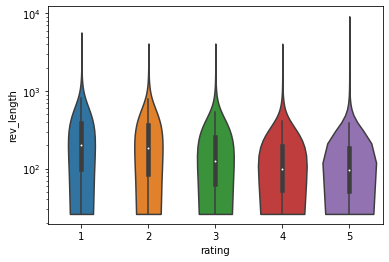

In [17]:
sns.violinplot(x= 'rating', y = 'rev_length', data=df_prep,saturation=0.75,bw=0.8,cut=0)
plt.yscale('log')

In [22]:
df_prep

business_status        object
geometry               object
icon                   object
name                   object
opening_hours          object
photos                 object
place_id               object
plus_code              object
reference              object
scope                  object
types                  object
vicinity               object
rating_rest           float64
user_ratings_total    float64
CBG                     int64
Radius                float64
price_level           float64
permanently_closed    float64
id_review              object
caption                object
relative_date          object
retrieval_date         object
rating                  int64
username               object
n_review_user           int64
n_photo_user            int64
url_user               object
census_block_group      int64
rev_length              int64
dtype: object

In [163]:
len(df_join)

382994